In [1]:
import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import string

In [2]:
dirlist = glob("blurred_images2/*")

In [3]:
target_names = list(string.digits + string.ascii_uppercase + string.ascii_lowercase)

In [4]:
def load_images(files):
    images = []
    total = 0
    for f in files:
        image = np.load(f)
        images.append(image.flatten())
        total += 1
        if total >= 50:
            break
    return images

In [5]:
data = []
target = []
for cls, dr in enumerate(dirlist):
    f = glob(dr + "/*.npy")
    images = load_images(f)
    for im in images:
        data.append(im)
        target.append(cls)

In [6]:
image_df = pd.DataFrame(data)
image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,3.409273e-05,5.181713e-04,0.004287,0.018051,0.039703,0.062077,0.110258,0.185471,0.230964,0.241113,...,0.241971,0.241946,0.241113,0.230957,0.185252,0.107569,0.049878,1.890557e-02,0.004291,0.000493
1,5.529355e-01,3.357988e-01,0.194872,0.198821,0.231904,0.241139,0.241946,0.241971,0.241971,0.241971,...,0.241946,0.241113,0.230964,0.185471,0.110258,0.062084,0.039728,1.807247e-02,0.004266,0.000493
2,0.000000e+00,1.791064e-08,0.000001,0.000027,0.000299,0.001637,0.006893,0.030081,0.095571,0.182575,...,0.107563,0.049852,0.018885,0.004312,0.000518,0.000034,0.000001,1.791064e-08,0.000000,0.000000
3,2.746018e-05,4.930137e-04,0.004291,0.018967,0.051966,0.134359,0.322744,0.550966,0.671824,0.697297,...,0.695294,0.672596,0.561115,0.368229,0.209353,0.097452,0.029116,5.124576e-03,0.000518,0.000027
4,1.791064e-08,1.186238e-06,0.000034,0.000518,0.004312,0.018885,0.049852,0.107563,0.185226,0.230099,...,0.053985,0.053765,0.051076,0.038870,0.018047,0.004266,0.000493,2.746018e-05,0.000001,0.000000


In [7]:
target_df = pd.DataFrame(target, columns=["class"])
target_df.head()

,class
0,0
1,0
2,0
3,0
4,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(image_df, target, test_size=0.2)

In [9]:
svm = SVC(kernel='poly', degree=2, C=1000, class_weight='auto')
svm.fit(X_train, y_train)
#neigh = KNeighborsClassifier(n_neighbors=5)
#neigh.fit(X_train, y_train) 

SVC(C=1000, cache_size=200, class_weight='auto', coef0=0.0, degree=2,
  gamma=0.0, kernel='poly', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.43      0.21      0.29        14
          1       0.60      0.38      0.46         8
          2       0.80      0.67      0.73         6
          3       1.00      1.00      1.00         7
          4       1.00      0.82      0.90        11
          5       0.56      0.62      0.59         8
          6       1.00      0.60      0.75        10
          7       0.79      0.92      0.85        12
          8       1.00      0.56      0.71         9
          9       0.83      0.83      0.83         6
          A       0.88      0.88      0.88        16
          B       0.80      0.89      0.84         9
          C       0.62      0.91      0.74        11
          D       0.90      0.90      0.90        10
          E       0.92      0.79      0.85        14
          F       0.64      0.90      0.75        10
          G       0.86      0.75      0.80         8
          H       0.60      0.75      0.67   

In [11]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 1 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 2 0 0]
 [0 1 0 ..., 0 5 0]
 [0 0 1 ..., 0 0 2]]


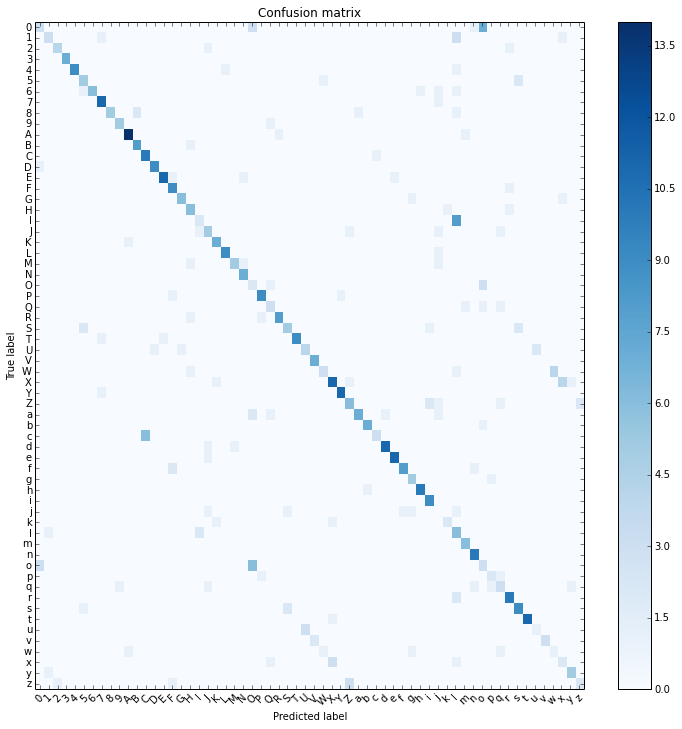

In [12]:
%matplotlib inline
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm)

In [13]:
svm.score(X_train, y_train)

0.84808454425363278

In [66]:
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

In [67]:
cm_df.to_csv('confusion_matrix.csv')

In [14]:
svm.score(X_test, y_test)

0.68838028169014087

In [15]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                   {'kernel': ['poly'], 'degree': [2, 3, 4 , 5],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print"# Tuning hyper-parameters for:", score

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print "Best parameters set found on development set:"
    print clf.best_params_
    print "Grid scores on development set:"
    for params, mean_score, scores in clf.grid_scores_:
        print mean_score, scores.std() * 2, params

# Tuning hyper-parameters for: precision
Best parameters set found on development set:
{'kernel': 'poly', 'C': 1000, 'degree': 2}
Grid scores on development set:
0.00241440464538 0.00368478058697 {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.00241873508496 0.00370266829054 {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.534107125644 0.0397810549644 {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.00241873508496 0.00370266829054 {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.707512491257 0.0223229804589 {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.535045489266 0.0377970889006 {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.705860301815 0.0385470318053 {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.708464878075 0.0205704393728 {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.701134761075 0.0429506623917 {'kernel': 'linear', 'C': 1}
0.692643665273 0.0391317116232 {'kernel': 'linear', 'C': 10}
0.688963610692 0.0416304840506 {'kernel': 'linear', 'C': 100}
0.688963610692 0.0416304840506 {'kernel': 'lin

/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
pca = PCA(n_components=150)
pca.fit(image_df)
X = pca.transform(image_df)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)

In [57]:
svm = SVC(kernel='poly', degree=2, C=10, class_weight='auto')
svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight='auto', coef0=0.0, degree=2, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
y_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[ 0  5  0 ...,  0  0  0]
 [ 0  6  0 ...,  0  0  0]
 [ 0 10  0 ...,  0  0  0]
 ..., 
 [ 0  1  0 ...,  0  0  0]
 [ 0  5  0 ...,  0  0  0]
 [ 0  4  0 ...,  0  0  0]]


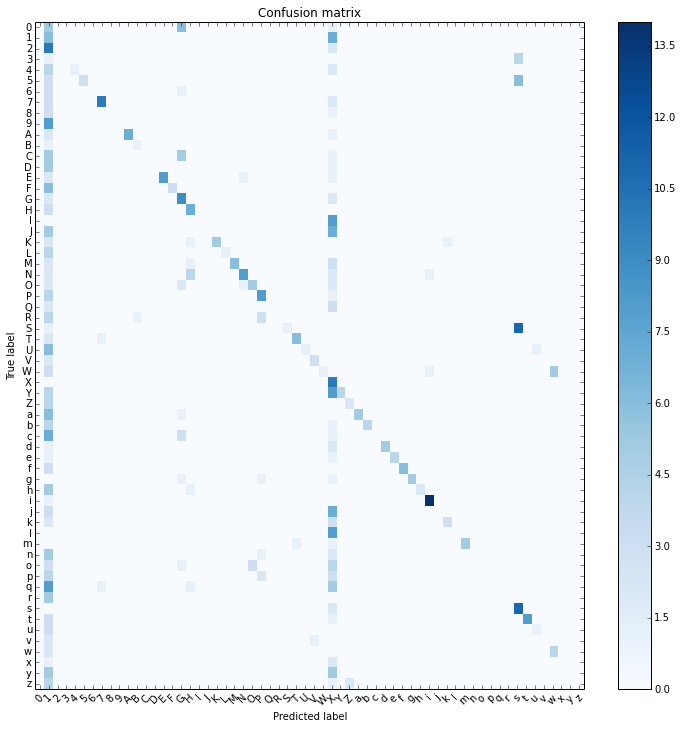

In [59]:
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm)

In [53]:
svm.score(X_train, y_train)

0.99735799207397624

In [54]:
svm.score(X_test, y_test)

0.55809859154929575

In [49]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                   {'kernel': ['poly'], 'degree': [2, 3, 4 , 5],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print"# Tuning hyper-parameters for:", score

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print "Best parameters set found on development set:"
    print clf.best_params_
    print "Grid scores on development set:"
    for params, mean_score, scores in clf.grid_scores_:
        print mean_score, scores.std() * 2, params

# Tuning hyper-parameters for: precision
Best parameters set found on development set:
{'kernel': 'poly', 'C': 10, 'degree': 2}
Grid scores on development set:
0.492533491334 0.0313634477998 {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.00979166094507 0.0236476897224 {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.641732498283 0.025265387045 {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.503871218973 0.0472411398335 {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.634956431357 0.0377903436684 {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.62882631948 0.015460617964 {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.634633042724 0.0369553357959 {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.617253293211 0.0193044586587 {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.60756934 0.0152164655831 {'kernel': 'linear', 'C': 1}
0.60756934 0.0152164655831 {'kernel': 'linear', 'C': 10}
0.60756934 0.0152164655831 {'kernel': 'linear', 'C': 100}
0.60756934 0.0152164655831 {'kernel': 'linear', 'C': 1000}
0.624539948

/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
confusion_matrix = pd.read_csv('confusion_matrix.csv', index_col= 0)
#confusion_matrix.drop(confusion_matrix.columns[0], axis=1, inplace = True)
confusion_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,q,r,s,t,u,v,w,x,y,z
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
top_list = []
for row in confusion_matrix.iterrows():
    largest = row[1].nlargest(5)
    top_list.append([row[0]]+[i for i in largest.iteritems()])
print top_list

[['0', ('0', 8), ('o', 2), ('n', 1), ('1', 0), ('2', 0)], ['1', ('1', 4), ('I', 1), ('l', 1), ('0', 0), ('2', 0)], ['2', ('2', 8), ('l', 1), ('r', 1), ('0', 0), ('1', 0)], ['3', ('3', 6), ('6', 1), ('l', 1), ('0', 0), ('1', 0)], ['4', ('4', 5), ('l', 2), ('W', 1), ('0', 0), ('1', 0)], ['5', ('5', 7), ('6', 1), ('l', 1), ('s', 1), ('0', 0)], ['6', ('6', 6), ('1', 1), ('5', 1), ('8', 1), ('W', 1)], ['7', ('7', 9), ('z', 1), ('0', 0), ('1', 0), ('2', 0)], ['8', ('8', 2), ('e', 1), ('t', 1), ('0', 0), ('1', 0)], ['9', ('9', 2), ('3', 1), ('6', 1), ('O', 1), ('0', 0)], ['A', ('A', 6), ('0', 0), ('1', 0), ('2', 0), ('3', 0)], ['B', ('B', 5), ('7', 1), ('8', 1), ('0', 0), ('1', 0)], ['C', ('C', 3), ('c', 2), ('p', 1), ('0', 0), ('1', 0)], ['D', ('D', 8), ('o', 4), ('0', 0), ('1', 0), ('2', 0)], ['E', ('E', 15), ('F', 1), ('0', 0), ('1', 0), ('2', 0)], ['F', ('F', 9), ('0', 0), ('1', 0), ('2', 0), ('3', 0)], ['G', ('G', 7), ('6', 1), ('C', 1), ('x', 1), ('0', 0)], ['H', ('H', 14), ('M', 1), ('

In [34]:
confusion_matrix.sum(axis=1)

0    11
1     6
2    10
3     8
4     8
5    10
6    11
7    10
8     4
9     5
A     6
B     7
C     6
D    12
E    16
F     9
G    10
H    16
I     9
J    11
K    13
L     8
M     9
N    16
O    10
P    12
Q     4
R    12
S    11
T     7
     ..
W    10
X    10
Y    11
Z    14
a     9
b     5
c     7
d     8
e    10
f     7
g     6
h    13
i     5
j    10
k     6
l    13
m    11
n     8
o     8
p     7
q     9
r     9
s    14
t    10
u     8
v     3
w     9
x    10
y     5
z     5
dtype: int64

In [35]:
def donut_chart(sizes, explode, labels, colors):
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)


    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()  

In [53]:
labels = 'v', 'V'
sizes = [1, 2]
colors = ['yellowgreen','lightskyblue']
explode = (0, 0)

In [54]:
donut_chart(sizes, explode, labels, colors)

In [31]:
non_zero = []
chars = {str(index):char for index, char in enumerate(target_names)}
for row in confusion_matrix.iterrows():
    nz = list(row[1].nonzero()[0])
    non_zero.append([row[0]]+[chars[str(i)] for i in nz])
print non_zero

[['0', '0', 'n', 'o'], ['1', '1', 'I', 'l'], ['2', '2', 'l', 'r'], ['3', '3', '6', 'l'], ['4', '4', 'W', 'l'], ['5', '5', '6', 'l', 's'], ['6', '1', '5', '6', '8', 'W', 'l'], ['7', '7', 'z'], ['8', '8', 'e', 't'], ['9', '3', '6', '9', 'O'], ['A', 'A'], ['B', '7', '8', 'B'], ['C', 'C', 'c', 'p'], ['D', 'D', 'o'], ['E', 'E', 'F'], ['F', 'F'], ['G', '6', 'C', 'G', 'x'], ['H', 'H', 'M', 'b'], ['I', 'I', 'l'], ['J', '7', 'I', 'J'], ['K', 'A', 'K', 'X', 'i'], ['L', 'J', 'L', 'V'], ['M', 'M'], ['N', 'E', 'M', 'N'], ['O', '0', 'O', 'Q', 'c', 'o'], ['P', 'F', 'P', 'Y', 'p'], ['Q', '1', 'Q'], ['R', '6', 'P', 'R', 'k', 'l'], ['S', '5', 'S', 'i', 'l', 's'], ['T', '1', 'T'], ['U', 'U', 'u'], ['V', 'V', 'l', 'v'], ['W', 'H', 'W', 'l', 'm'], ['X', 'X', 'l', 'x'], ['Y', '1', 'G', 'I', 'Y'], ['Z', '1', '2', '7', 'N', 'Z', 'i', 'p', 'z'], ['a', 'a', 'o'], ['b', 'b'], ['c', 'C', 'c'], ['d', 'D', 'J', 'X', 'd'], ['e', '4', 'e'], ['f', 'f', 'n', 't'], ['g', 'g', 'p'], ['h', 'H', 'b', 'h'], ['i', 'i'], ['j'